In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

In [23]:
import numpy as np

In [24]:
import pandas as pd

In [25]:
import matplotlib.pyplot as plt

In [26]:
# read training data set 
train_image = pd.read_csv('/run/media/amr/DCC00F8CC00F6C58/Third Year/Ai/AI/csvTrainImages 60k x 784.csv')
train_label =  pd.read_csv('/run/media/amr/DCC00F8CC00F6C58/Third Year/Ai/AI/csvTrainLabel 60k x 1.csv')

In [27]:
# read testing data set
test_image = pd.read_csv('/run/media/amr/DCC00F8CC00F6C58/Third Year/Ai/AI/csvTestImages 10k x 784.csv')
test_label = pd.read_csv('/run/media/amr/DCC00F8CC00F6C58/Third Year/Ai/AI/csvTestLabel 10k x 1.csv')

In [28]:
# normalization
fac = 0.99 / 255
train_image = np.asfarray(train_image) * fac + 0.01
test_image = np.asfarray(test_image) * fac + 0.01
train_label = np.asfarray(train_label)
test_label = np.asfarray(test_label)

In [29]:
# Build model
# The function of relu is simply  y(x)=max(0,x).
# The function of sigmoid is simply  y(x)=max(0,1).
model = Sequential()
model.add( Dense(256,activation='relu',input_dim=784))
model.add( Dense(128,activation='relu'))
model.add( Dense(10,activation='softmax'))

In [30]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [31]:
model.fit(train_image, train_label, epochs=5)
test_loss, test_acc = model.evaluate(test_image,  test_label, verbose=2)

print(f'\nTest accuracy: {test_acc}')

Epoch 1/5
1875/1875 [==============================] - 17s 9ms/step - loss: 1.5090 - accuracy: 0.9575
Epoch 2/5
1875/1875 [==============================] - 17s 9ms/step - loss: 1.4830 - accuracy: 0.9789
Epoch 3/5
1875/1875 [==============================] - 17s 9ms/step - loss: 1.4792 - accuracy: 0.9824
Epoch 4/5
1875/1875 [==============================] - 22s 11ms/step - loss: 1.4762 - accuracy: 0.9853
Epoch 5/5
1875/1875 [==============================] - 20s 11ms/step - loss: 1.4745 - accuracy: 0.9868
313/313 - 1s - loss: 1.4818 - accuracy: 0.9792

Test accuracy: 0.9791979193687439


In [35]:
#Predictions
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_image)

print(f'The Matrix of predictions: {predictions[:20]}')

print(f'The decimal predictions: {np.argmax(predictions[:20],axis=1)}')

The Matrix of predictions: [[0.08533674 0.23196931 0.08533674 0.08533674 0.08533674 0.08533674
  0.08533674 0.08533674 0.08533674 0.08533674]
 [0.08533674 0.08533674 0.23196921 0.08533674 0.08533678 0.08533674
  0.08533674 0.08533674 0.08533674 0.08533674]
 [0.08533674 0.08533674 0.08533674 0.23196931 0.08533674 0.08533674
  0.08533674 0.08533674 0.08533674 0.08533674]
 [0.08533674 0.08533674 0.08533674 0.08533674 0.23196931 0.08533674
  0.08533674 0.08533674 0.08533674 0.08533674]
 [0.08533674 0.08533674 0.08533674 0.08533674 0.08533674 0.23196931
  0.08533674 0.08533674 0.08533674 0.08533674]
 [0.08533674 0.08533674 0.08533674 0.08533674 0.08533674 0.08533674
  0.23196931 0.08533674 0.08533674 0.08533674]
 [0.08533674 0.08533674 0.08533674 0.08533674 0.08533674 0.08533674
  0.08533674 0.23196931 0.08533674 0.08533674]
 [0.08533674 0.08533674 0.08533674 0.08533674 0.08533674 0.08533674
  0.08533674 0.08533674 0.23196931 0.08533674]
 [0.08533674 0.08533674 0.08533674 0.08533674 0.08533

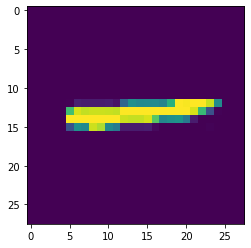

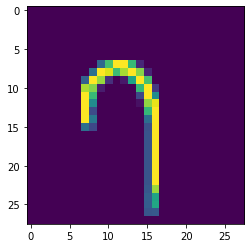

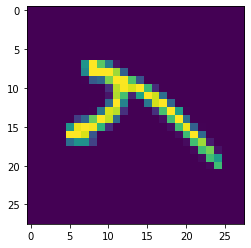

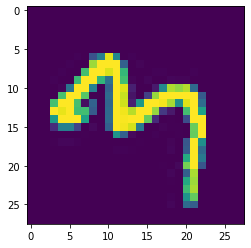

In [33]:
for i in range(0,4):
    first_image= test_image[i]
    first_image= np.array(first_image,dtype='float')
    pixels=first_image.reshape((28,28))
    plt.imshow(pixels)
    plt.show()